# **Mean Reversion Trading Algo**


## **0- Introduccion Teorica**
La Reversión a la Media se basa en el principio fundamental de que los precios de los activos tienden a volver a su valor promedio con el tiempo. En pocas palabras, si el precio de un activo es demasiado alto, existe una alta probabilidad de que disminuirá; de la misma manera, si el precio de un activo es demasiado bajo, es probable que aumente.

Este tipo de estartegia utiliza análisis técnico para determinar cuándo el precio de un activo probablemente ha alcanzado the "top" o the "down", que se pueden imaginar como los dos extremos de una campana. En la reversión a la media, el precio de un activo que alcanza la cima es un indicador de que es probable que disminuya y vuelva al promedio. Por otro lado, si el precio de un activo ha alcanzado el fondo, podría tomarse como una señal de un posible aumento hacia la media.

### **Ventajas**

- Simplicidad: En comparación con otras estrategias de trading, la reversión a la media puede ser relativamente sencilla de implementar. Esto puede resultar atractivo para traders que tienen conocimientos técnicos limitados pero desean obtener beneficios de los mercados financieros.

- Efectiva: La reversión a la media puede ser muy efectiva para generar beneficios, especialmente en ciclos alcistas del mercado.

- Menos riesgosa: La reversión a la media se basa en la idea de que los precios eventualmente volverán a su valor promedio, lo que la hace más predecible.

## **1- Importar librerias**

In [3]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

## **2- Dowling Data**

In [6]:

# Definir las fechas de inicio y fin
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=5*365)

# Descargar datos de TSLA para los últimos 5 años
tsla_last_years = yf.download('TSLA', start=start_date, end=end_date)

# Mostrar los primeros registros del DataFrame
print(tsla_last_years.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-19  22.506666  23.134001  21.982668  22.198000  22.198000  124113000
2018-12-20  21.803333  22.019333  20.791332  21.025333  21.025333  136078500
2018-12-21  21.160000  21.564667  20.829332  21.318001  21.318001  120252000
2018-12-24  20.900000  20.966667  19.680000  19.692667  19.692667   83398500
2018-12-26  20.000000  21.798000  19.606001  21.739332  21.739332  122446500


## **3- Transformacion de Datos**

In [8]:
# Create a DataFrame for the "Close" prices of TSLA
tsla_close = pd.DataFrame(tsla_last_years['Close'])
tsla_close.head()

,Close
Date,
2018-12-19,22.198000
2018-12-20,21.025333
2018-12-21,21.318001
2018-12-24,19.692667
2018-12-26,21.739332


In [11]:
# Calcular los rendimientos logarítmicos
tsla_close['returns'] = np.log(tsla_close["Close"]).diff()

# Calcular el promedio móvil de 21 días
ma = 21
tsla_close['ma'] = tsla_close['Close'].rolling(ma).mean()

# Calcular la proporción de Cierre respecto al promedio móvil
tsla_close['ratio'] = tsla_close['Close'] / tsla_close['ma']

# Mostrar el DataFrame con las nuevas columnas
print(tsla_close.head())

                Close  ma  ratio   returns
Date                                      
2018-12-19  22.198000 NaN    NaN       NaN
2018-12-20  21.025333 NaN    NaN -0.054274
2018-12-21  21.318001 NaN    NaN  0.013824
2018-12-24  19.692667 NaN    NaN -0.079305
2018-12-26  21.739332 NaN    NaN  0.098877


In [12]:
tsla_close['ratio'].describe()

count    1237.000000
mean        1.022720
std         0.117705
min         0.527688
25%         0.952616
50%         1.012915
75%         1.079226
max         1.565975
Name: ratio, dtype: float64

## **4- Graficos**

In [13]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(tsla_close['ratio'].dropna(), percentiles)

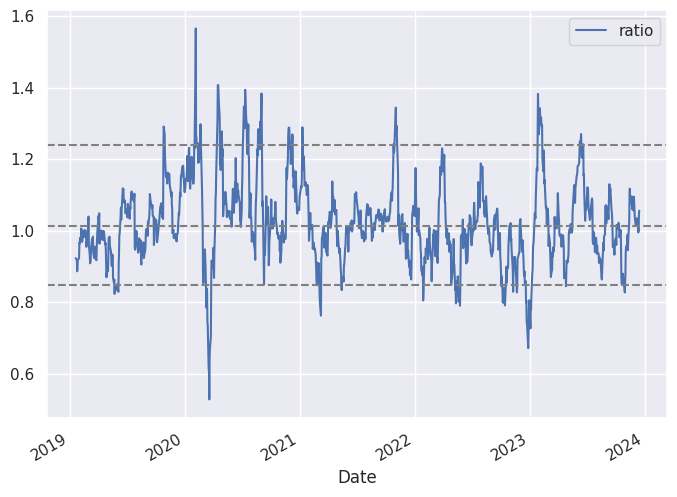

In [14]:
tsla_close['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

In [15]:
short = p[-1]
long = p[0]
tsla_close['position'] = np.where(tsla_close.ratio > short, -1, np.nan)
tsla_close['position'] = np.where(tsla_close.ratio < long, 1, tsla_close['position'])
tsla_close['position'] = tsla_close['position'].ffill()

<Axes: xlabel='Date'>

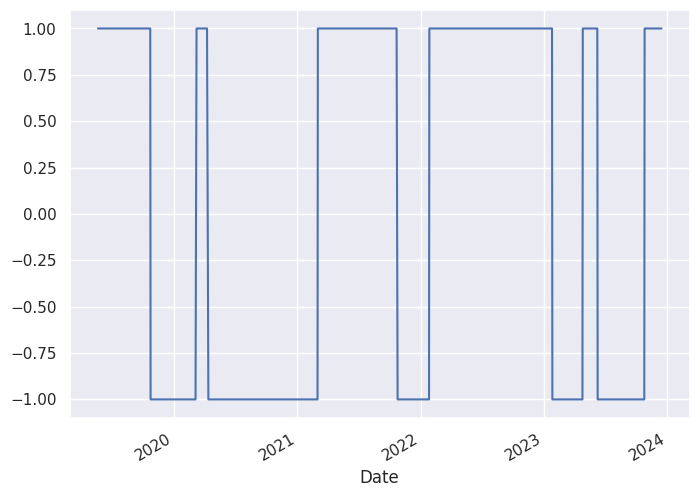

In [16]:
tsla_close.position.dropna().plot()

In [17]:
tsla_close['strat_return'] = tsla_close['returns'] * tsla_close['position'].shift()

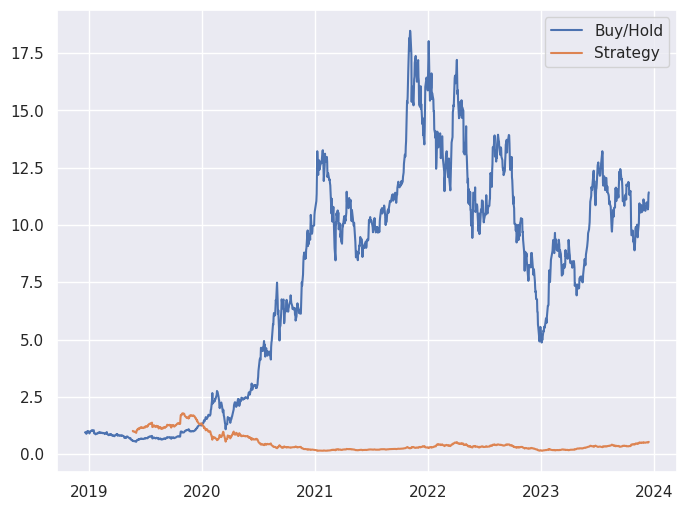

In [18]:
plt.plot(np.exp(tsla_close['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(tsla_close['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [19]:
print(np.exp(tsla_close['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(tsla_close['strat_return'].dropna()).cumprod()[-1] - 1)

10.419947766589946
-0.46526634102207176
